In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import layers
from sklearn.metrics import r2_score
import os

In [2]:
car_data = pd.read_csv("CarPricesPrediction.csv",index_col="Unnamed: 0")

In [3]:
car_data

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85
...,...,...,...,...,...,...
995,Nissan,Camry,2010,149032,Excellent,24548.50
996,Chevrolet,F-150,2014,20608,Excellent,26969.70
997,Ford,Altima,2016,109851,Good,20507.55
998,Toyota,Silverado,2010,11704,Good,31414.90


In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 54.7+ KB


In [5]:
car_data.shape

(1000, 6)

In [6]:
car_data.describe()

,Year,Mileage,Price
count,1000.00000,1000.000000,1000.000000
mean,2015.86500,78796.927000,22195.205650
std,3.78247,39842.259941,4245.191585
min,2010.00000,10079.000000,12613.000000
25%,2013.00000,44942.750000,18961.862500
50%,2016.00000,78056.500000,22247.875000
75%,2019.00000,112366.250000,25510.275000
max,2022.00000,149794.000000,31414.900000


In [7]:
car_data.isnull().sum()

Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [8]:
car_data.columns

Index(['Make', 'Model', 'Year', 'Mileage', 'Condition', 'Price'], dtype='object')

<Axes: xlabel='Price', ylabel='Count'>

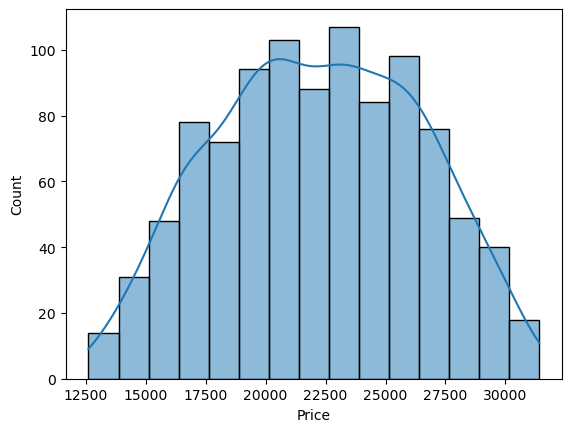

In [9]:
sns.histplot(car_data, x=car_data.Price, kde=True)


<Axes: xlabel='Make', ylabel='Price'>

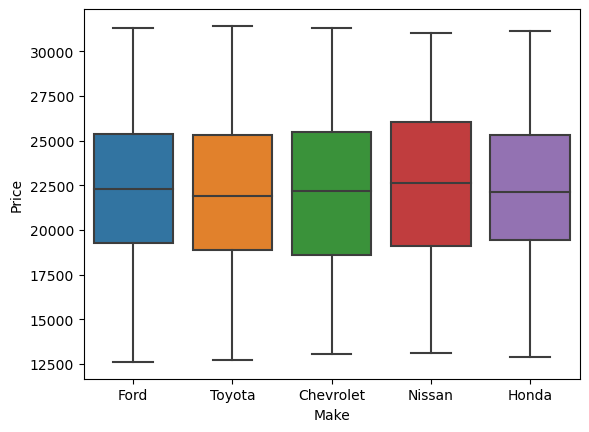

In [10]:
sns.boxplot(data=car_data,x='Make',y='Price')

<Axes: xlabel='Model', ylabel='Price'>

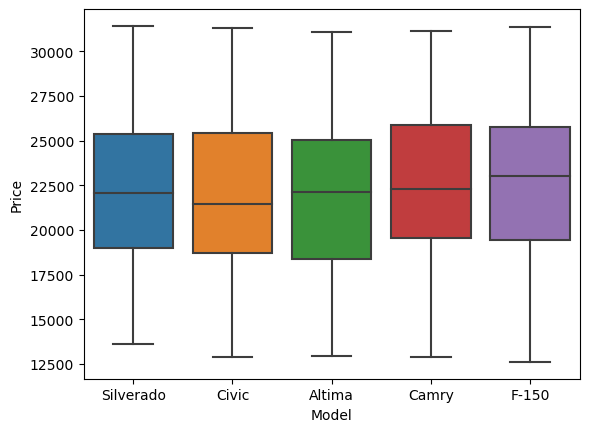

In [11]:
sns.boxplot(data=car_data,x='Model',y='Price')

<Axes: xlabel='Condition', ylabel='Price'>

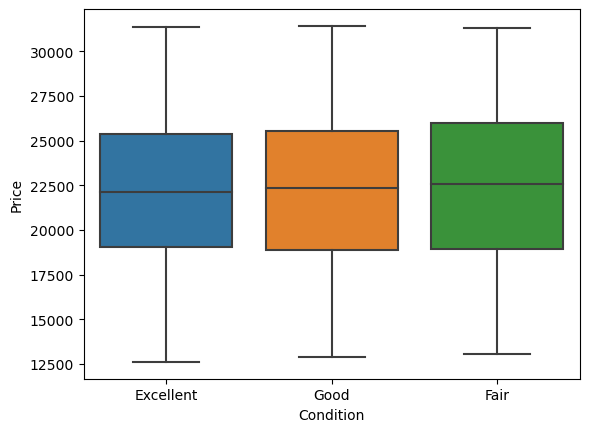

In [12]:
sns.boxplot(data=car_data,x='Condition',y='Price')

<Axes: xlabel='Year', ylabel='Price'>

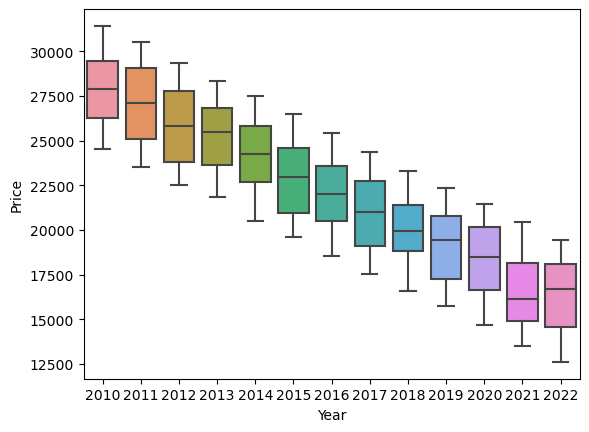

In [13]:
sns.boxplot(data=car_data,x='Year',y='Price')

C:\Users\himan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


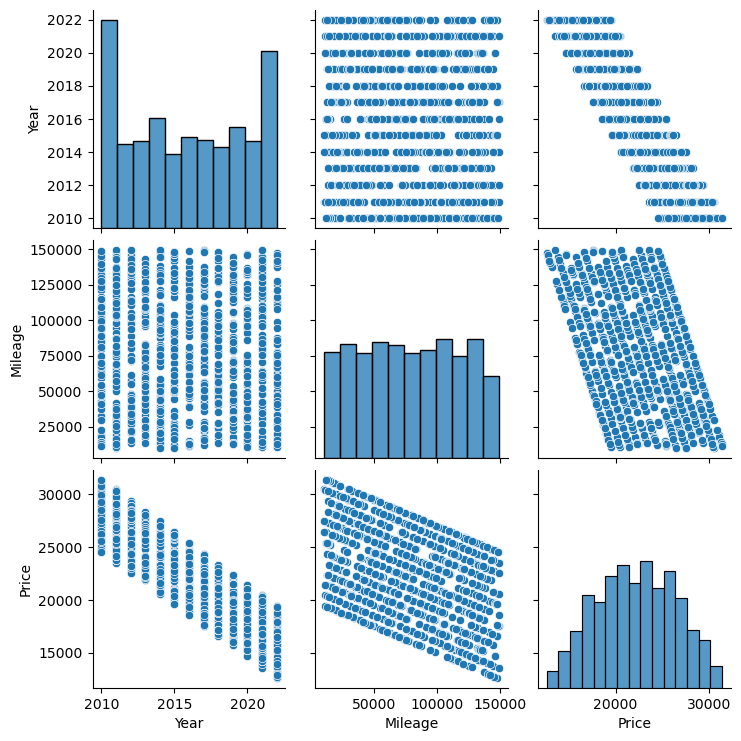

In [14]:
sns.pairplot(data=car_data)

<Axes: xlabel='Make', ylabel='Price'>

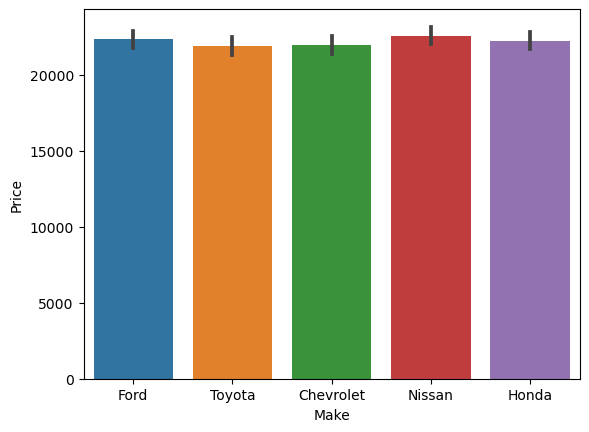

In [15]:
sns.barplot(data=car_data,x='Make',y='Price')

<Axes: xlabel='Model', ylabel='Price'>

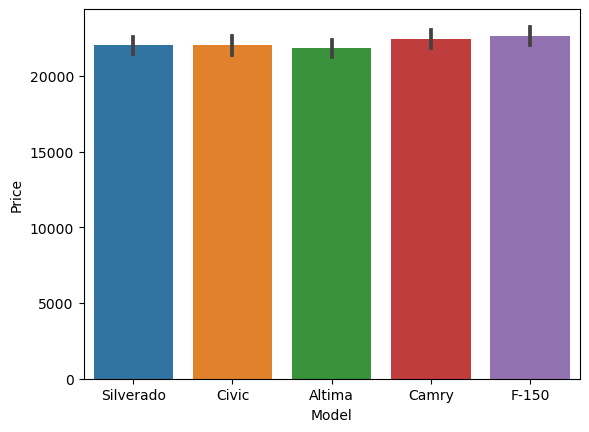

In [16]:
sns.barplot(data=car_data,x='Model',y='Price')

<Axes: xlabel='Condition', ylabel='Price'>

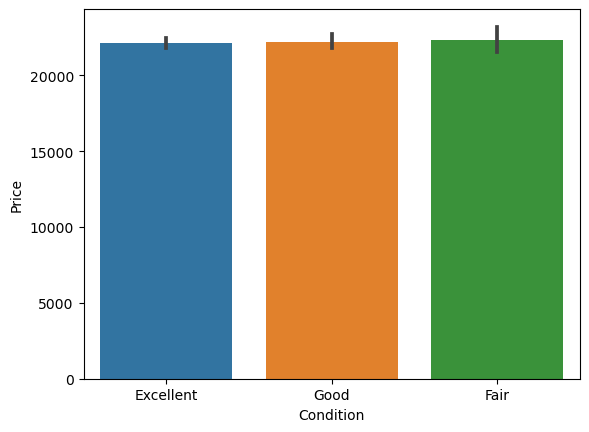

In [17]:
sns.barplot(data=car_data,x='Condition',y='Price')

C:\Users\himan\AppData\Local\Temp\ipykernel_14976\164616043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car_data.corr(),annot=True)


<Axes: >

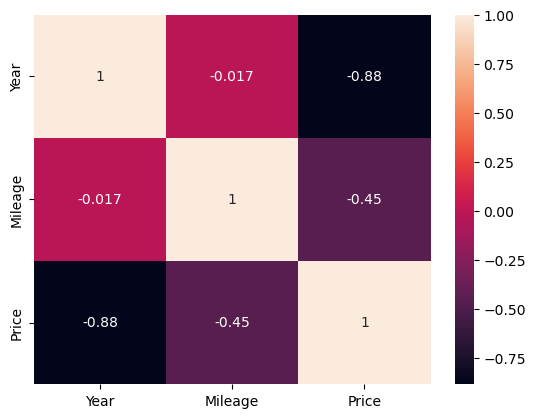

In [18]:
sns.heatmap(car_data.corr(),annot=True)

In [19]:
X = car_data[["Year","Mileage"]]
y = car_data["Price"]

In [20]:
X

,Year,Mileage
0,2022,18107
1,2014,13578
2,2016,46054
3,2022,34981
4,2019,63565
...,...,...
995,2010,149032
996,2014,20608
997,2016,109851
998,2010,11704


In [21]:
X.shape

(1000, 2)

In [22]:
y

0      19094.75
1      27321.10
2      23697.30
3      18251.05
4      19821.85
         ...   
995    24548.50
996    26969.70
997    20507.55
998    31414.90
999    18580.60
Name: Price, Length: 1000, dtype: float64

In [23]:
y.shape

(1000,)

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [25]:
X.shape

(1000, 2)

In [26]:
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [27]:
y.shape

(1000, 1)

In [28]:
X

array([[1.        , 0.05745983],
       [0.33333333, 0.02504384],
       [0.5       , 0.25748846],
       ...,
       [0.5       , 0.71411087],
       [0.        , 0.01163082],
       [0.58333333, 0.84680242]])

In [29]:
y

array([[0.3447391 ],
       [0.78226669],
       [0.58953085],
       [0.29986597],
       [0.38341072],
       [0.80880124],
       [0.78787782],
       [0.5272632 ],
       [0.49580627],
       [0.4176413 ],
       [0.25276435],
       [0.44098735],
       [0.71226844],
       [0.1868242 ],
       [0.62431456],
       [0.28483026],
       [0.53042778],
       [0.41136268],
       [0.70816247],
       [0.70755615],
       [0.429071  ],
       [0.12752966],
       [0.42294396],
       [0.23155373],
       [0.85307602],
       [0.48448029],
       [0.42184832],
       [0.67044022],
       [0.30225669],
       [0.61980438],
       [0.83354608],
       [0.33786213],
       [0.86162037],
       [0.23997309],
       [0.44217872],
       [0.58879156],
       [0.38282035],
       [0.59999787],
       [0.61573033],
       [0.19709444],
       [0.14825097],
       [0.28996272],
       [0.07392072],
       [0.52822853],
       [0.93233397],
       [0.73018418],
       [0.75016621],
       [0.625

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [31]:
x_train.shape

(800, 2)

In [32]:
x_test.shape

(200, 2)

In [33]:
y_train.shape

(800, 1)

In [34]:
y_test.shape

(200, 1)

In [35]:
model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(16,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1)
])

In [36]:
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mean_absolute_error"])


In [37]:
batch_size = 64
epochs = 25

In [38]:
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)


Epoch 1/25


12/12 [==============================] - 3s 40ms/step - loss: 0.3597 - mean_absolute_error: 0.5704 - val_loss: 0.2744 - val_mean_absolute_error: 0.4947
Epoch 2/25
12/12 [==============================] - 0s 9ms/step - loss: 0.2499 - mean_absolute_error: 0.4567 - val_loss: 0.1837 - val_mean_absolute_error: 0.3848
Epoch 3/25
12/12 [==============================] - 0s 10ms/step - loss: 0.1709 - mean_absolute_error: 0.3512 - val_loss: 0.1215 - val_mean_absolute_error: 0.2866
Epoch 4/25
12/12 [==============================] - 0s 11ms/step - loss: 0.1198 - mean_absolute_error: 0.2770 - val_loss: 0.0851 - val_mean_absolute_error: 0.2253
Epoch 5/25
12/12 [==============================] - 0s 13ms/step - loss: 0.0906 - mean_absolute_error: 0.2400 - val_loss: 0.0660 - val_mean_absolute_error: 0.1977
Epoch 6/25
12/12 [==============================] - 0s 10ms/step - loss: 0.0748 - mean_absolute_error: 0.2189 - val_loss: 0.0570 - val_mean_absolute_error: 0.1866
Epoch 7/25
12/12 [===

In [39]:
model.evaluate(x_test,y_test)


7/7 [==============================] - 0s 3ms/step - loss: 0.0060 - mean_absolute_error: 0.0634


[0.005995094310492277, 0.06340832263231277]

In [40]:
y_pred = model.predict(x_test)


7/7 [==============================] - 0s 3ms/step


In [41]:
r2_score(y_test,y_pred)


0.8954095160690643